In [1]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
import seaborn as sns
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils

FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2

[2024-07-17 19:31:00,906][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-17 19:31:02,503][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
# ANIMALS
ANIMAL_IDS = [
    "C214",
    "C215",
    "C220",
    "C221",
    "C222",
    "C223",
]
mode = "today"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = utils.dj_utils.return_date_window(
    latest_date=latest_date, n_days_back=20
)

In [3]:
# LOAD IN TRIALS DATA
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min
)

no sessions found for C214 between 2024-06-27 and 2030-01-01
fetched 16 sessions for C215 between 2024-06-27 and 2024-07-16
fetched 2 sessions for C220 between 2024-06-27 and 2024-06-28
fetched 14 sessions for C221 between 2024-06-27 and 2024-07-16
fetched 16 sessions for C222 between 2024-06-27 and 2024-07-16
no sessions found for C223 between 2024-06-27 and 2030-01-01


In [4]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=True
)

Fetched data from SessionAggDate table from 2024-06-27 to 2024-07-16  
No new data from today, 2024-07-17 to add to SessionAggDate.

48 daily summaries fetched for animals: 
['C214', 'C215', 'C220', 'C221', 'C222', 'C223']
between 2024-06-27 and 2024-07-16


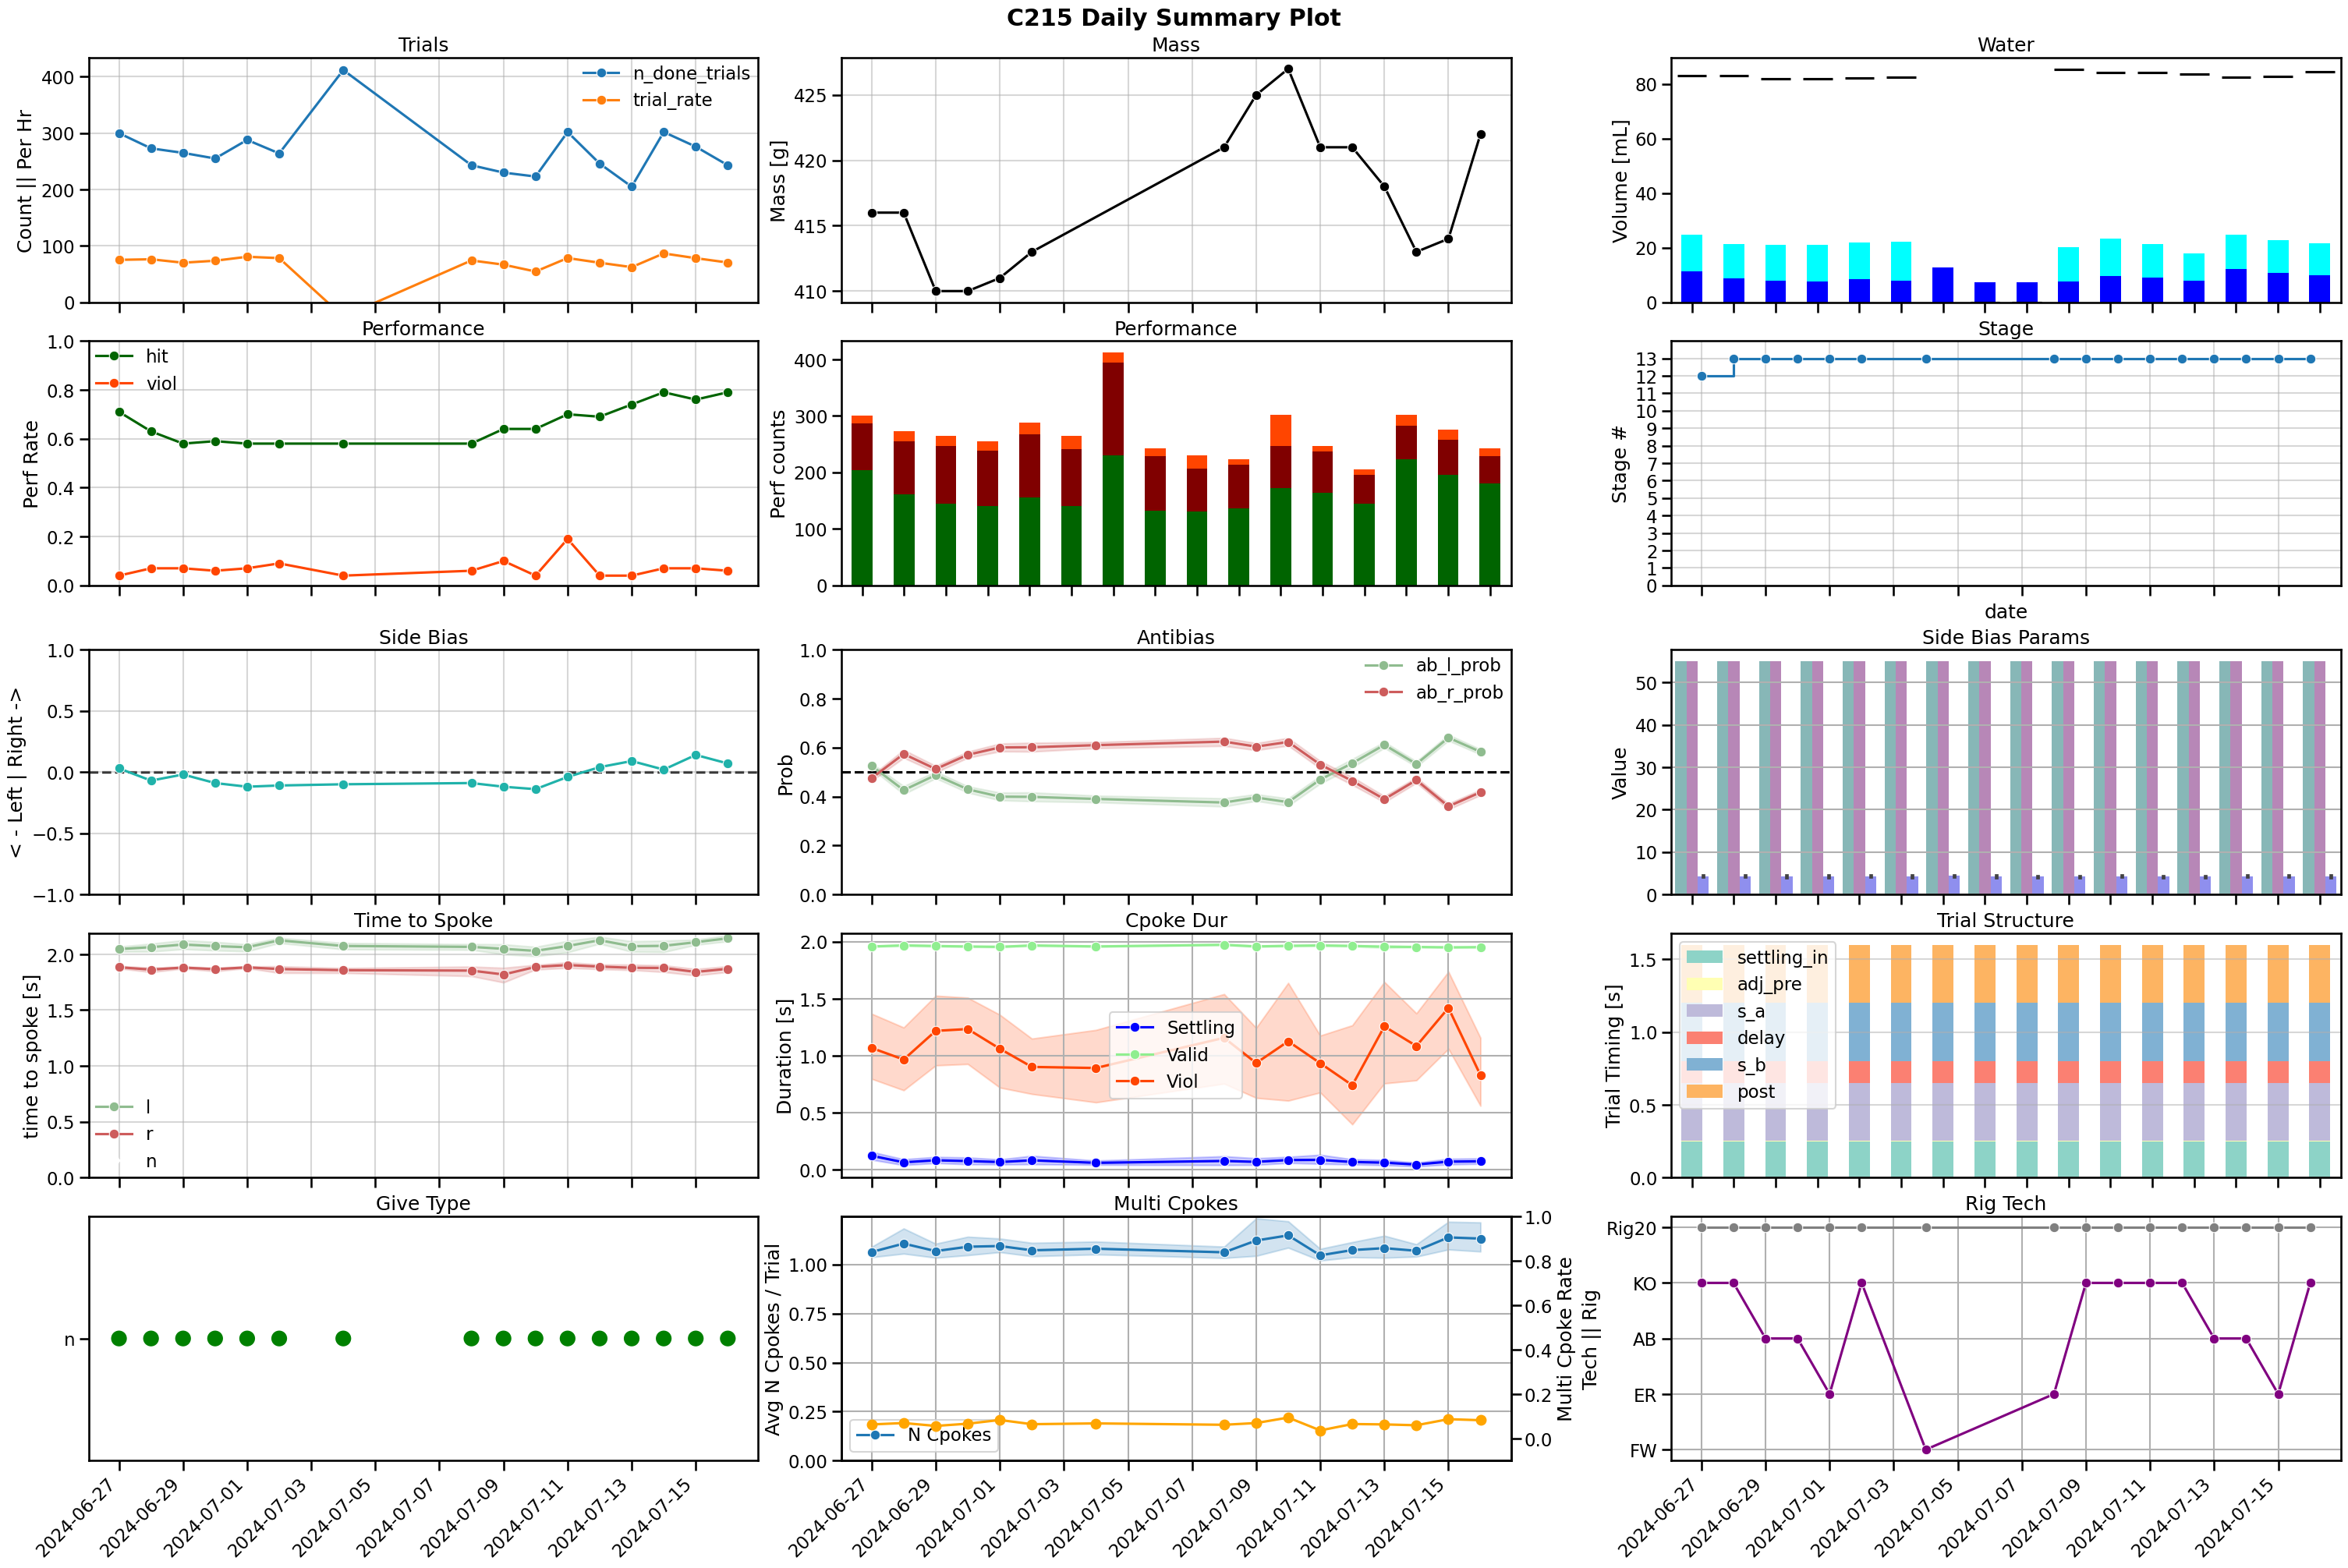

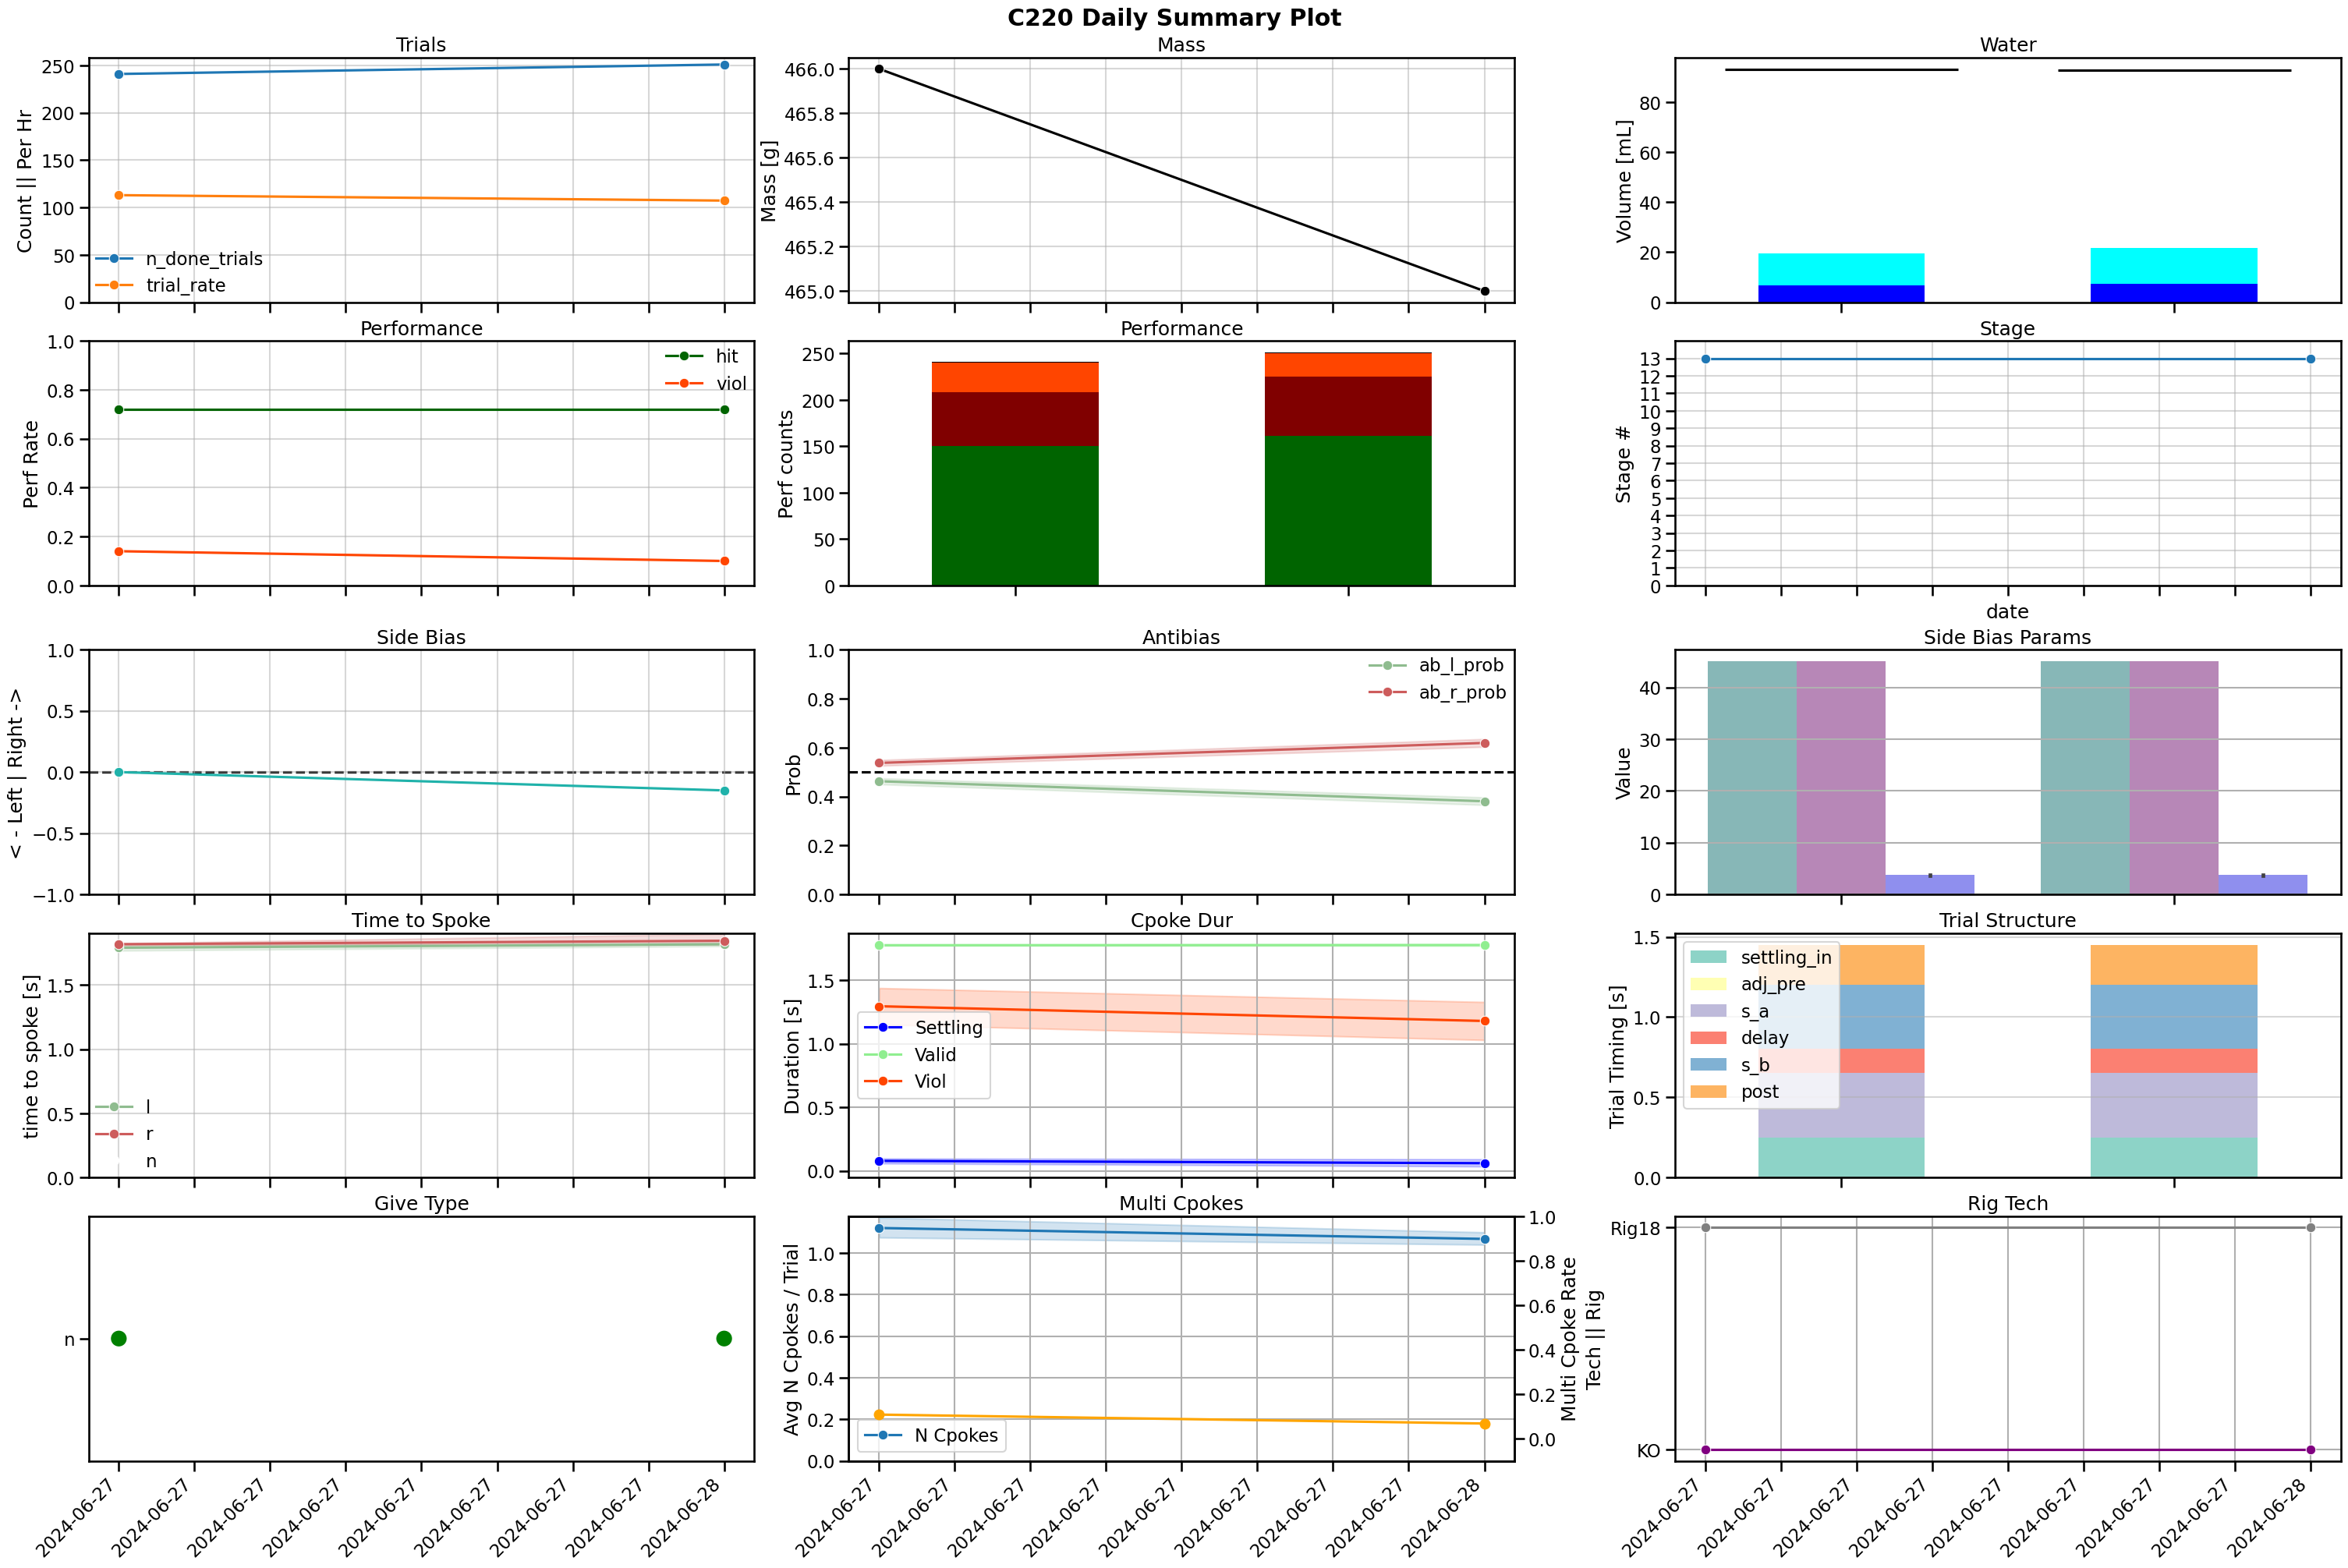

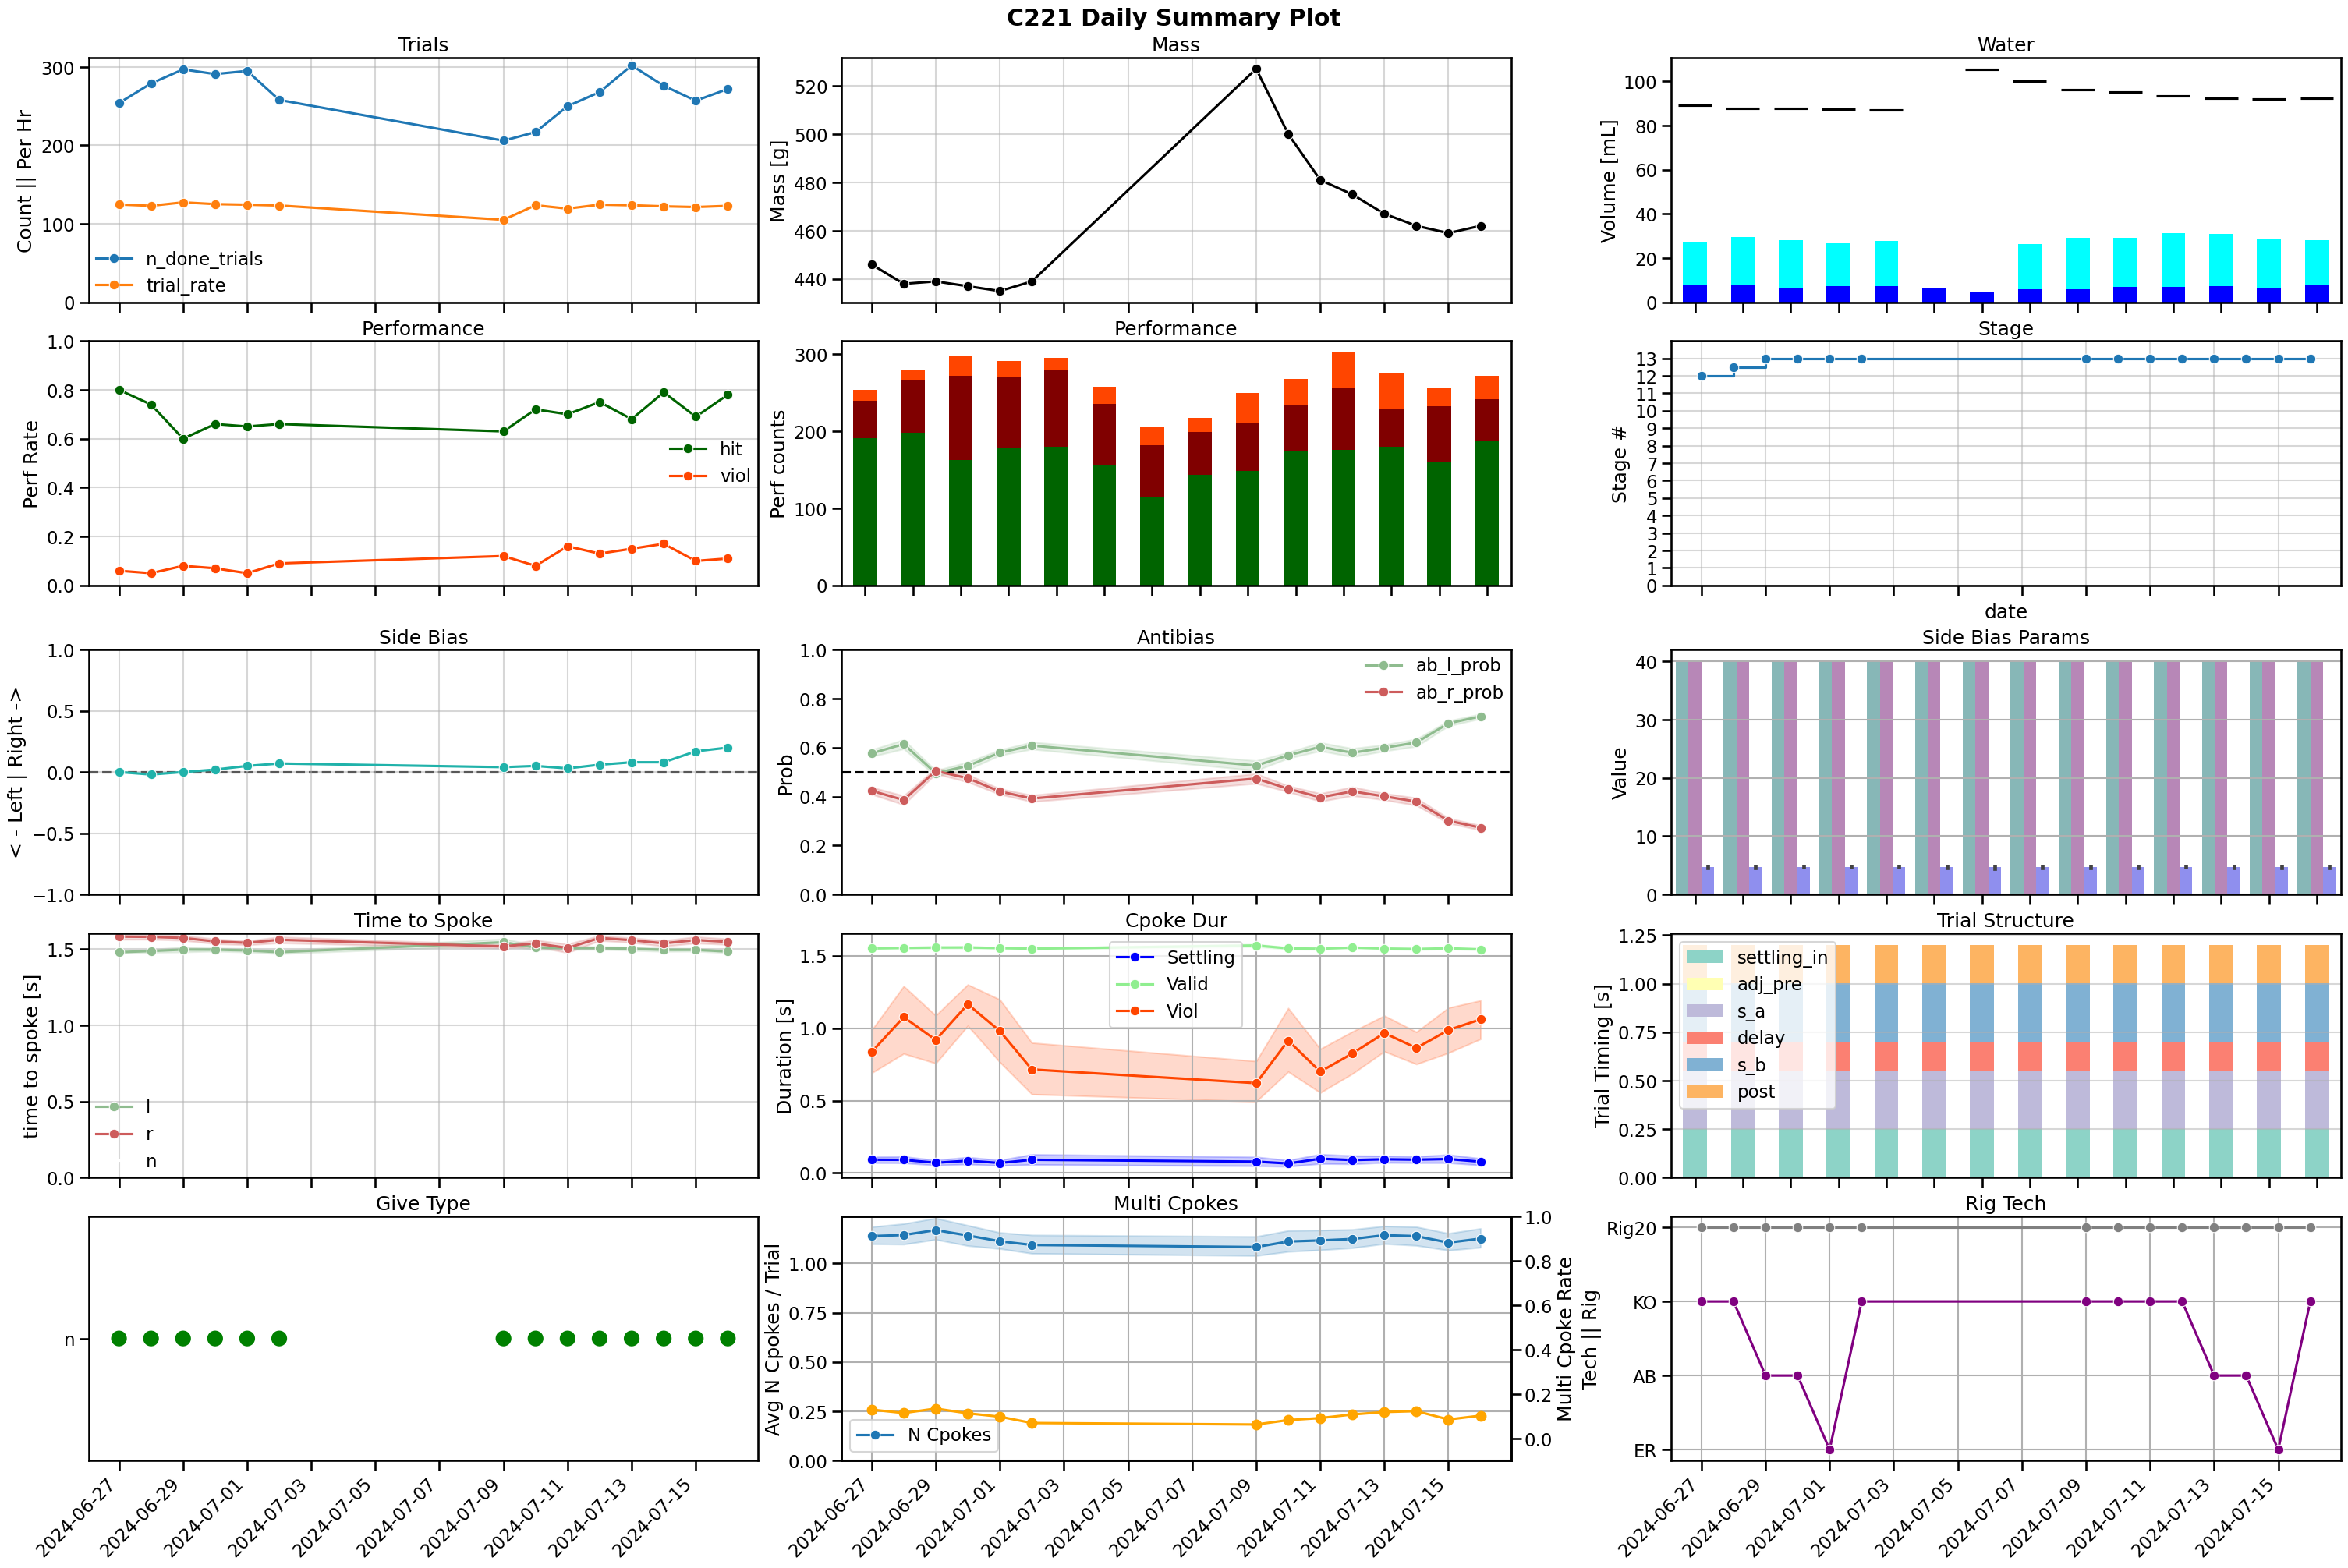

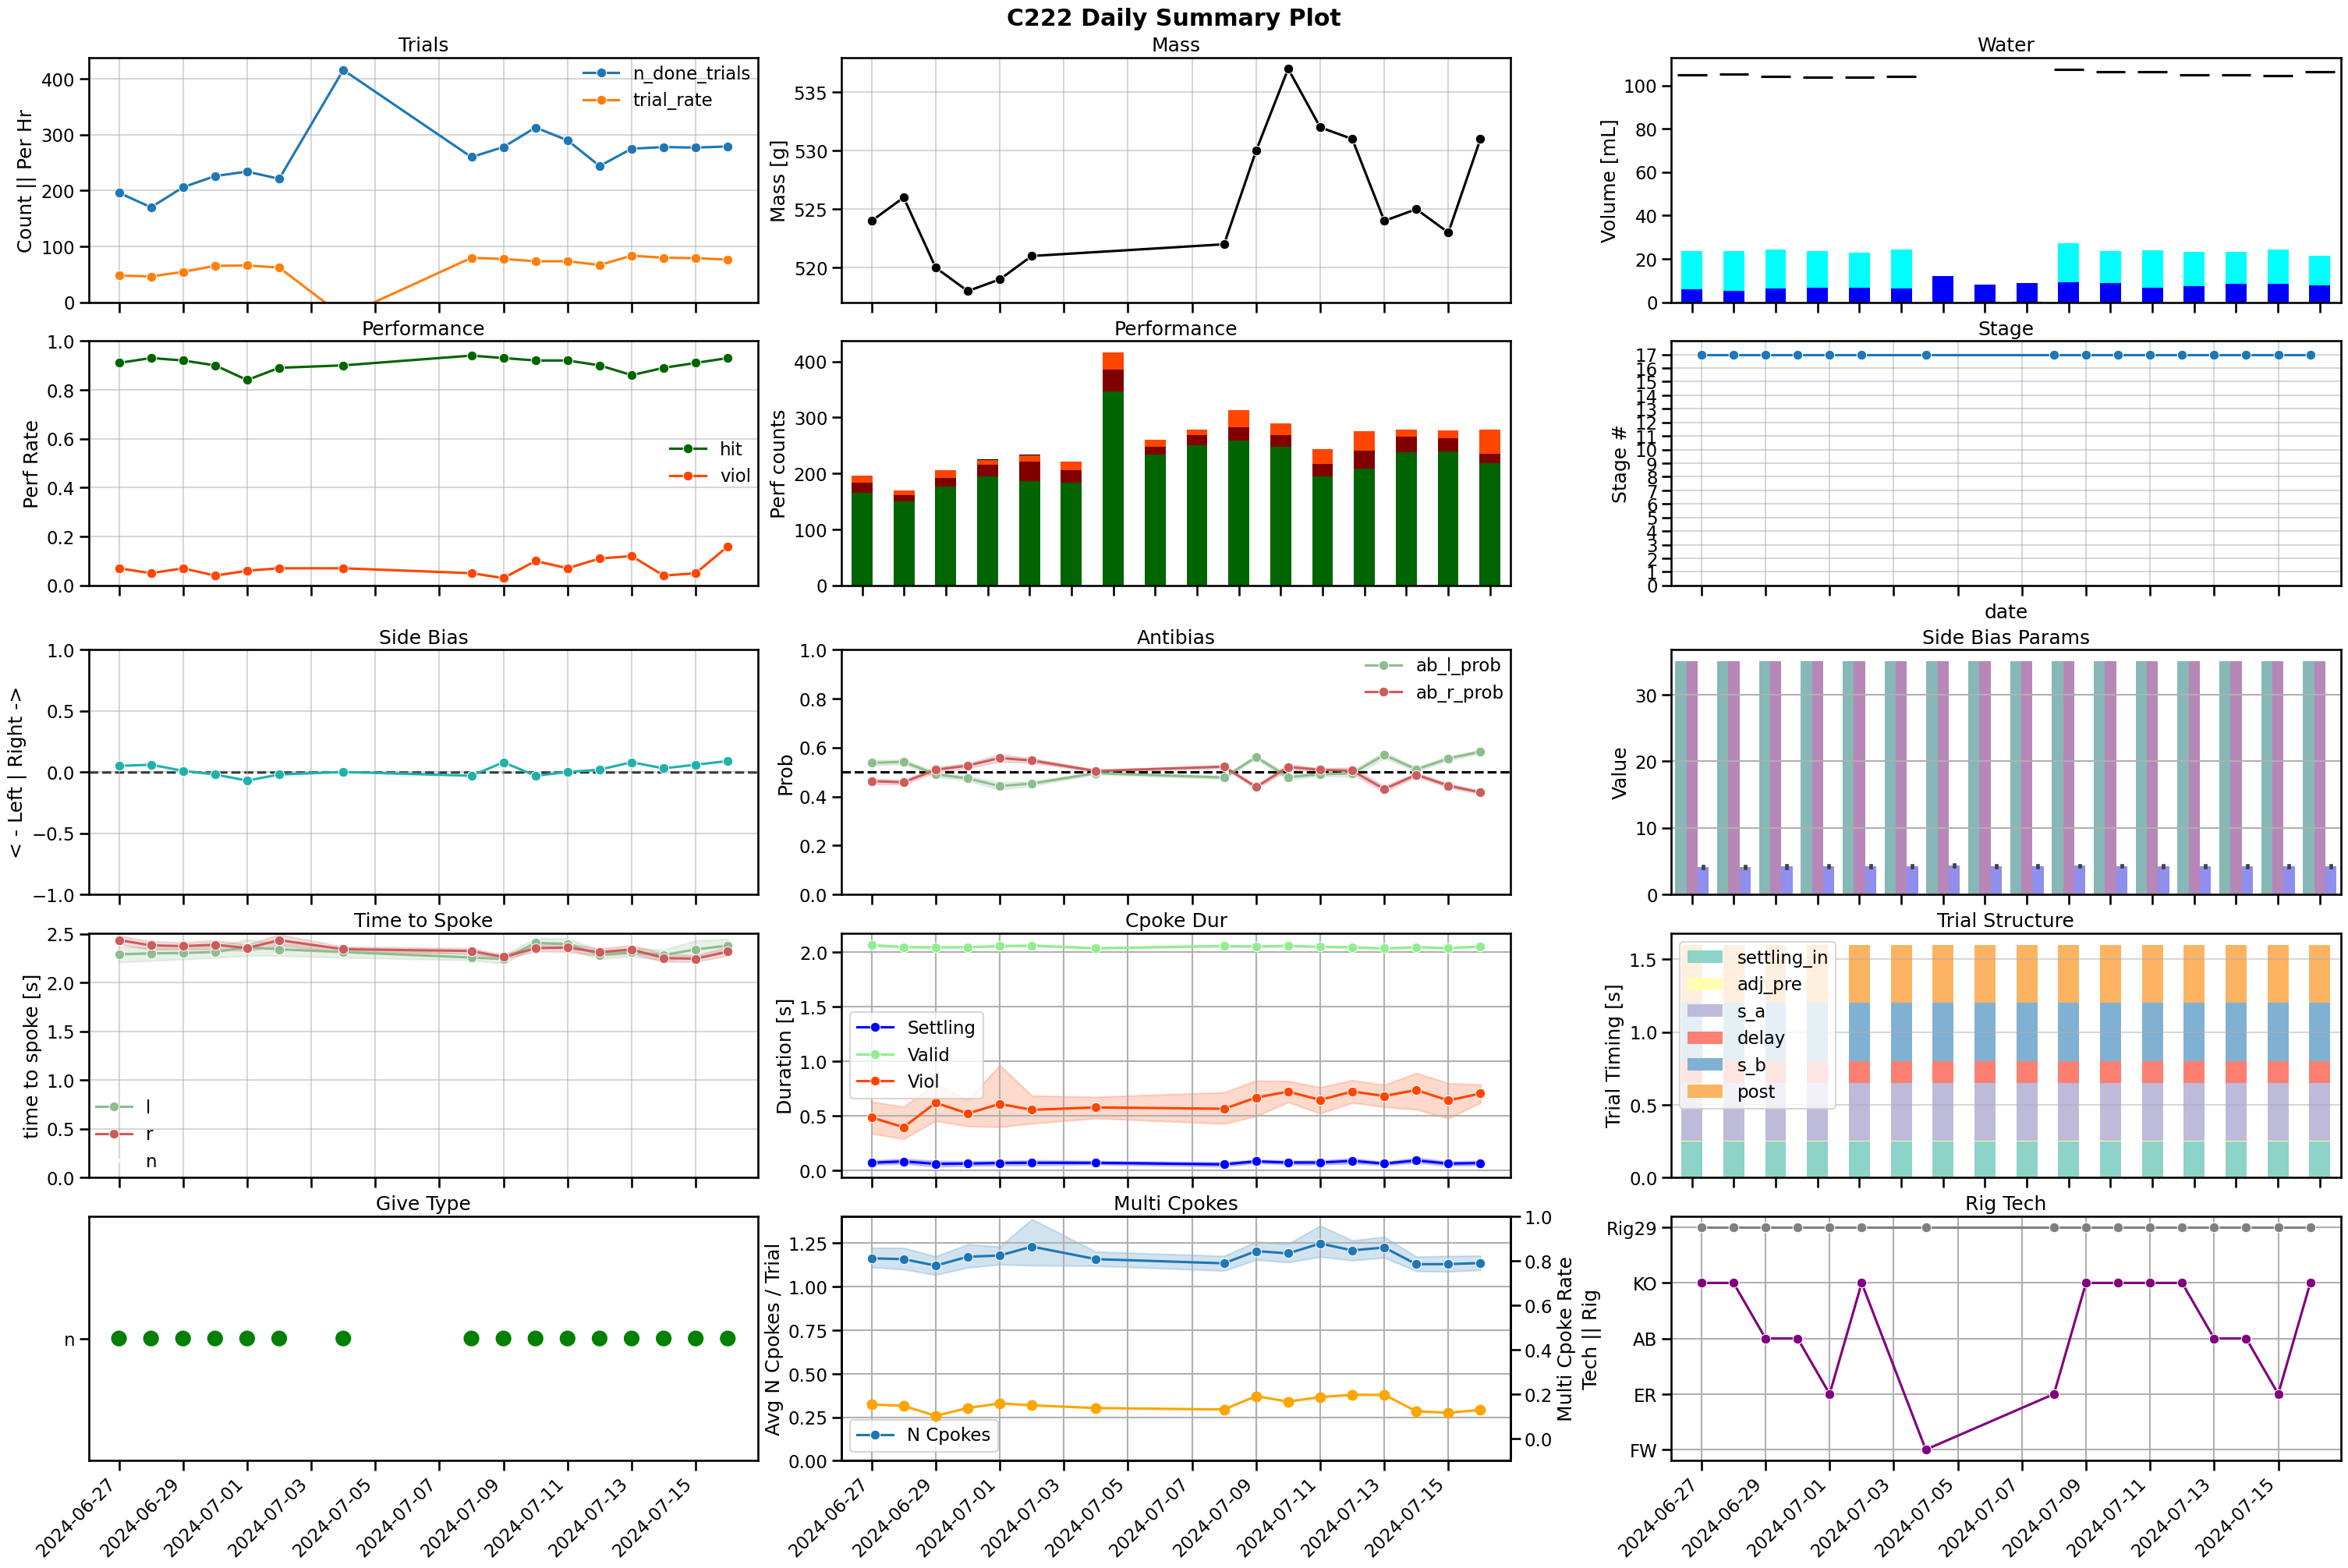

In [5]:
animals_on_recovery = ["C214", "C223"]
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    if animal_id in animals_on_recovery:
        continue
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [7]:
# PLOT TRIALS DATA
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C222_2024-07-15_day_summary
Fetched data from SessionAggDate table from 2024-07-15 to 2024-07-15  
No new data from today, 2024-07-17 to add to SessionAggDate.
['s_a', 's_b']
making C222_2024-07-16_day_summary
Fetched data from SessionAggDate table from 2024-07-16 to 2024-07-16  
No new data from today, 2024-07-17 to add to SessionAggDate.
['s_a', 'delay', 's_b']
